In [10]:
import numpy as np
import pylab as plt
import matplotlib.animation as animation

In [2]:
def x1_prime(t,x1,x2):
    return(x2)

In [3]:
def x2_prime(t,x1,x2):
    return(np.cos(x1)*grav/rad-x2*gamma/(mass*rad))

In [4]:
def second_order_runge_kutta_4_solver(x10,x20,t):
    x1 = np.zeros([t.shape[0],1])
    x2 = np.zeros([t.shape[0],1])
    x1[0,0] = x10
    x2[0,0] = x20
    for i in range (1,t.shape[0]):
        h = t[i,0]-t[i-1,0]
        k11 = h*x1_prime(t[i-1,0],x1[i-1,0],x2[i-1,0])
        k12 = h*x2_prime(t[i-1,0],x1[i-1,0],x2[i-1,0])
        k21 = h*x1_prime(t[i-1,0]+h/2,x1[i-1,0]+k11/2,x2[i-1,0]+k12/2)
        k22 = h*x2_prime(t[i-1,0]+h/2,x1[i-1,0]+k11/2,x2[i-1,0]+k12/2)
        k31 = h*x1_prime(t[i-1,0]+h/2,x1[i-1,0]+k21/2,x2[i-1,0]+k22/2)
        k32 = h*x2_prime(t[i-1,0]+h/2,x1[i-1,0]+k21/2,x2[i-1,0]+k22/2)
        k41 = h*x1_prime(t[i-1,0]+h,x1[i-1,0]+k31,x2[i-1,0]+k32)
        k42 = h*x2_prime(t[i-1,0]+h,x1[i-1,0]+k31,x2[i-1,0]+k32)
        x1[i,0] = x1[i-1,0] + (k11+2*k21+2*k31+k41)/6
        x2[i,0] = x2[i-1,0] + (k12+2*k22+2*k32+k42)/6
    return(x1,x2)

In [5]:
def init():
    x = np.linspace(0, rad*np.cos(x10), anim_points)
    y = np.negative(np.linspace(0, rad*np.sin(x10), anim_points))
    string.set_data(x, y)
    ball.set_data(rad*np.cos(x10), rad*np.sin(x10))
    return string, ball

In [6]:
def animate(i):
    x = np.linspace(0, rad*np.cos(pendulum_theta[i]), anim_points)
    y = np.negative(np.linspace(0, rad*np.sin(pendulum_theta[i]), anim_points))
    string.set_data(x, y)
    ball.set_data(rad*np.cos(pendulum_theta[i]), rad*np.sin(pendulum_theta[i]))
    return string, ball

In [7]:
grav = 9.81
rad = 1
mass = 1
gamma = 0
x10 = 0
x20 = 0
t_0 = 0
t_end = 100
n_points = 200
anim_points = 1000

In [8]:
t = np.transpose(np.array([np.linspace(t_0,t_end,n_points)]))
pendulum_theta, pendulum_omega = second_order_runge_kutta_4_solver(x10,x20,t)

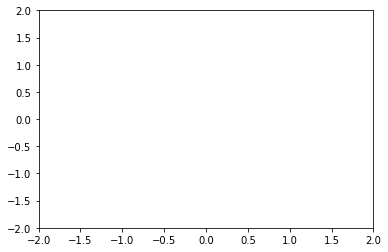

In [13]:
fig1 = plt.figure()
ax1 = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
string, = ax1.plot([], [], 'o-', lw=2)
ball, = ax1.plot([], [], 'o', lw=2)
pivot, = ax1.plot([], [], 'o', lw=2)
pendulum_animation = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=100, interval=20, blit=True)
plt.show()